In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0],
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3608)])

2.17.0
3.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same',input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609,994 (2.33 MB)

 Trainable params: 609,674 (2.33 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
hist = model.fit(train_images, train_labels, batch_size=512,
                 validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.7245 - loss: 0.8552 - val_accuracy: 0.1676 - val_loss: 2.1318
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8655 - loss: 0.3834 - val_accuracy: 0.3960 - val_loss: 1.6641
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8908 - loss: 0.3145 - val_accuracy: 0.7530 - val_loss: 0.7859
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8994 - loss: 0.2896 - val_accuracy: 0.8780 - val_loss: 0.4076
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9049 - loss: 0.2630 - val_accuracy: 0.8984 - val_loss: 0.2756
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9114 - loss: 0.2495 - val_accuracy: 0.9039 - val_loss: 0.2565
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9169 - loss: 0.2387 - val_accuracy: 0.9142 - val_loss: 0.2313
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9211 - loss: 0.2189 - val_acc

In [ ]:
max_tr_acc = max(hist.history['accuracy'])
max_val_acc = max(hist.history['val_accuracy'])
print('max training accuracy = {:.4}'.format(100*max_tr_acc))
print('max validation accuracy = {:.4}'.format(100*max_val_acc))

max training accuracy = 96.2
max validation accuracy = 93.37


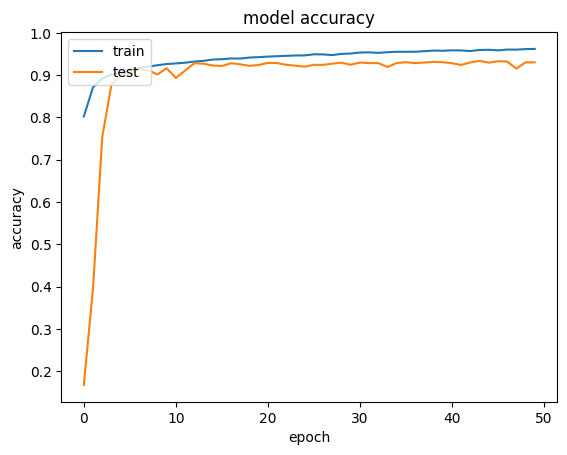

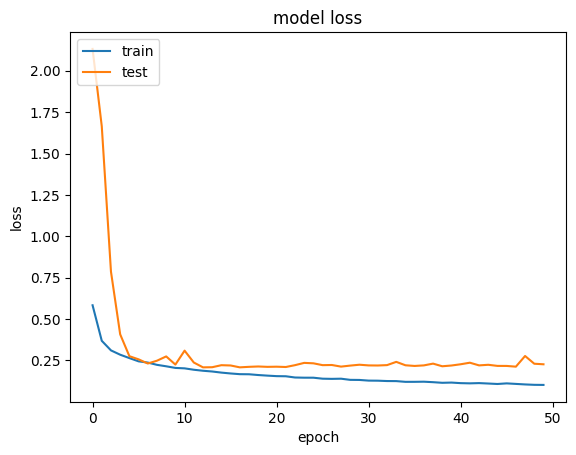

In [ ]:
# plot accuracy history
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ผลของ Batch Normalisation
สิ่งที่จะเห็นเป็นอันดับแรกเลยคือ โมเดลของเรานั้น train ได้เร็วมากๆ จากกราฟจะเห็นได้ว่า train เพียงไม่กี่รอบประสิทธภาพก็สูงได้แล้ว <br>
แค่เพียง 5 รอบก็ทำให้ acc ขึ้นไปถึง 90%++ <br>
เราสามารถสรุปได้ว่า batch normalisation เป็นการเร่งกระบวนการ train เฉยๆ (อาจส่งผลถึงการ regularisation) บ้างในบางกรณี

### แต่ Batch Normalisation ดันไม่ช่วยเรื่อง acc เลย
ถึงแม้จะ train ได้เร็วแค่ไหนก็ตาม epoch สูงแค่ไหนก็ตาม ก็จะเห็นเหตุการณ์ flat linning, acc มาถึงจุดสูงสุดของมันแล้ว

### plot อีกแบบผ่านการใช้งาน library plotly

หากใครยังไม่มีlibrary plotly ในเครื่องสามารถติดตั้งได้ผ่าน command ด้านล่างนี้
pip install plotly

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

print(__version__) # requires version >= 1.9.0

'''for Colab user'''
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
# https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

5.15.0


In [ ]:
init_notebook_mode(connected=True)
history = hist

In [ ]:
num_epochs = len(history.history['accuracy'])
epochs_x = np.linspace(1, num_epochs)
# สร้าง list ของค่า x เป็นอาเรย์ [1,2,3,...,num_epochs]

train_acc_trace = go.Scatter(
    x = epochs_x,
    y = history.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train'

)
# สร้าง scatter plot (พล็อตจุด) ที่มีแกน x เป็น epochs
# และ แกน y เป็นค่า train accuracy ของแต่ละ epoch

test_acc_trace = go.Scatter(
    x = epochs_x,
    y = history.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test'
)
# สร้าง scatter plot (พล็อตจุด) ที่มีแกน x เป็น epochs
# และ แกน y เป็นค่า validation accuracy ของแต่ละ epoch

train_loss_trace = go.Scatter(
    x = epochs_x,
    y = history.history['loss'],
    mode = 'lines+markers',
    name = 'train'
)
test_loss_trace = go.Scatter(
    x = epochs_x,
    y = history.history['val_loss'],
    mode = 'lines+markers',
    name = 'test'
)

In [ ]:
configure_plotly_browser_state() # for Colab user

acc_data = [train_acc_trace, test_acc_trace]
iplot(acc_data, filename='acc-convo x 2 + dense 64 + dropout x 3 + bnorm')

loss_data = [train_loss_trace, test_loss_trace]
iplot(loss_data, filename='loss-convo x 2 + dense 64 + dropout x 3 + bnorm')

ข้อดีหลักๆของ Plotly คือเป็น interactive graph <br>
เป็นกราฟที่สามารถใช้เมาส์ชี้ไปที่จุดบนกราฟได้เลย ยิ่งถ้าเป็นกราฟ 3D จะมีฟีเจอร์ที่มากกว่านั้นด้วย
และยังสามารถแสดงผลบน Jupyter ได้ทันที เป็น library ที่น่าสนใจอย่างมาก

Link:<br>
- https://plotly.com/python/
- slider ปรับค่า x
- https://plotly.com/python/sliders/
- 3D graph
- https://plotly.com/python/3d-axes/